In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [65]:
os.chdir(r'C:\Users\vigne\Desktop\WORK\DATASETS')

In [66]:
df=pd.read_csv('Status_Kelmarsh_1.csv', skiprows=9)

In [67]:
df.to_csv('cleaned_file.csv', index=False)

In [68]:
df.head()

,Timestamp start,Timestamp end,Duration,Status,Code,Message,Comment,Service contract category,IEC category
0,2020-01-01 08:42:37,2020-01-01 08:43:25,00:00:48,Informational,10,Wind < start wind,NaN,External stop (low wind speed) (5),Out of Environmental Specification
1,2020-01-01 08:42:37,-,-,Informational,100070,Brake program 50,NaN,NaN,Out of Environmental Specification
2,2020-01-01 08:43:25,-,-,Informational,0,System OK,NaN,System OK (32),Full Performance
3,2020-01-01 08:43:25,-,-,Informational,100130,Automatic start-up,NaN,NaN,Full Performance
4,2020-01-01 09:34:35,-,-,Informational,100180,Run-up,NaN,NaN,Technical Standby


In [24]:
df.head(50)

,Timestamp start,Timestamp end,Duration,Status,Code,Message,Comment,Service contract category,IEC category
0,2020-01-01 08:42:37,2020-01-01 08:43:25,00:00:48,Informational,10,Wind < start wind,NaN,External stop (low wind speed) (5),Out of Environmental Specification
1,2020-01-01 08:42:37,-,-,Informational,100070,Brake program 50,NaN,NaN,Out of Environmental Specification
2,2020-01-01 08:43:25,-,-,Informational,0,System OK,NaN,System OK (32),Full Performance
3,2020-01-01 08:43:25,-,-,Informational,100130,Automatic start-up,NaN,NaN,Full Performance
4,2020-01-01 09:34:35,-,-,Informational,100180,Run-up,NaN,NaN,Technical Standby
5,2020-01-01 09:46:36,2020-01-01 09:48:56,00:02:20,Informational,65,Absence of wind during run-up,NaN,Operating states (28),Out of Environmental Specification
6,2020-01-01 09:46:36,-,-,Informational,100070,Brake program 50,NaN,NaN,Out of Environmental Specification
7,2020-01-01 09:48:56,-,-,Informational,0,System OK,NaN,System OK (32),Full Performance
8,2020-01-01 09:48:56,-,-,Informational,100130,Automatic start-up,NaN,NaN,Full Performance
9,2020-01-01 10:42:31,-,-,Informational,100180,Run-up,NaN,NaN,Technical Standby


In [25]:
df.fillna(0, inplace=True)

In [26]:
df.head(15)

,Timestamp start,Timestamp end,Duration,Status,Code,Message,Comment,Service contract category,IEC category
0,2020-01-01 08:42:37,2020-01-01 08:43:25,00:00:48,Informational,10,Wind < start wind,0.0,External stop (low wind speed) (5),Out of Environmental Specification
1,2020-01-01 08:42:37,-,-,Informational,100070,Brake program 50,0.0,0,Out of Environmental Specification
2,2020-01-01 08:43:25,-,-,Informational,0,System OK,0.0,System OK (32),Full Performance
3,2020-01-01 08:43:25,-,-,Informational,100130,Automatic start-up,0.0,0,Full Performance
4,2020-01-01 09:34:35,-,-,Informational,100180,Run-up,0.0,0,Technical Standby
5,2020-01-01 09:46:36,2020-01-01 09:48:56,00:02:20,Informational,65,Absence of wind during run-up,0.0,Operating states (28),Out of Environmental Specification
6,2020-01-01 09:46:36,-,-,Informational,100070,Brake program 50,0.0,0,Out of Environmental Specification
7,2020-01-01 09:48:56,-,-,Informational,0,System OK,0.0,System OK (32),Full Performance
8,2020-01-01 09:48:56,-,-,Informational,100130,Automatic start-up,0.0,0,Full Performance
9,2020-01-01 10:42:31,-,-,Informational,100180,Run-up,0.0,0,Technical Standby


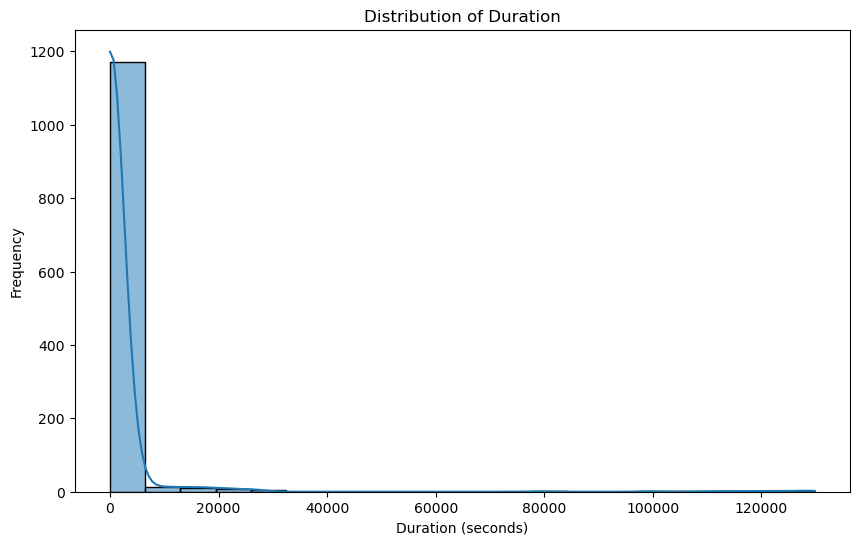

In [30]:
#Timestamp columns to datetime objects
df['Timestamp start'] = pd.to_datetime(df['Timestamp start'])
df['Timestamp end'] = pd.to_datetime(df['Timestamp end'])

#timedelta column
df['Duration'] = df['Duration'].apply(lambda x: pd.to_timedelta(x) if ':' in str(x) else pd.NaT)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'].dt.total_seconds(), bins=20, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

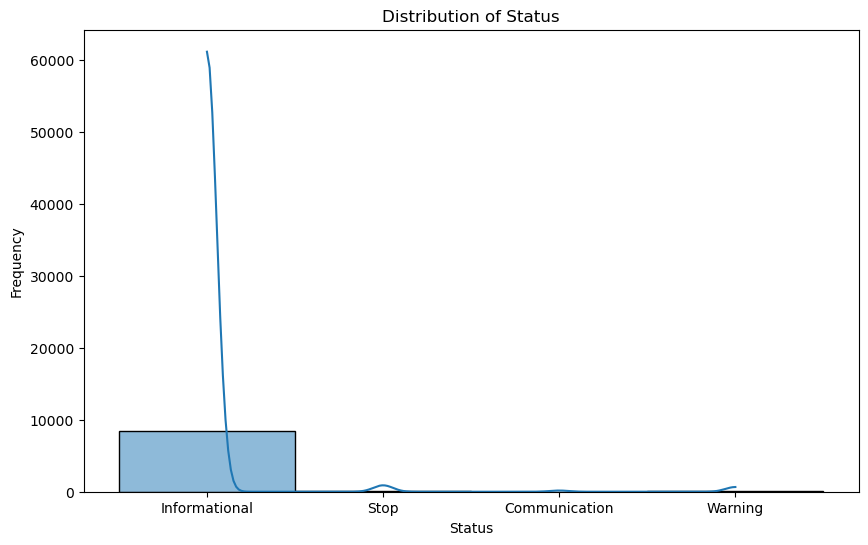

In [86]:
# Histogram for 'Status'
plt.figure(figsize=(10, 6))
sns.histplot(df['Status'], bins=20, kde=True)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

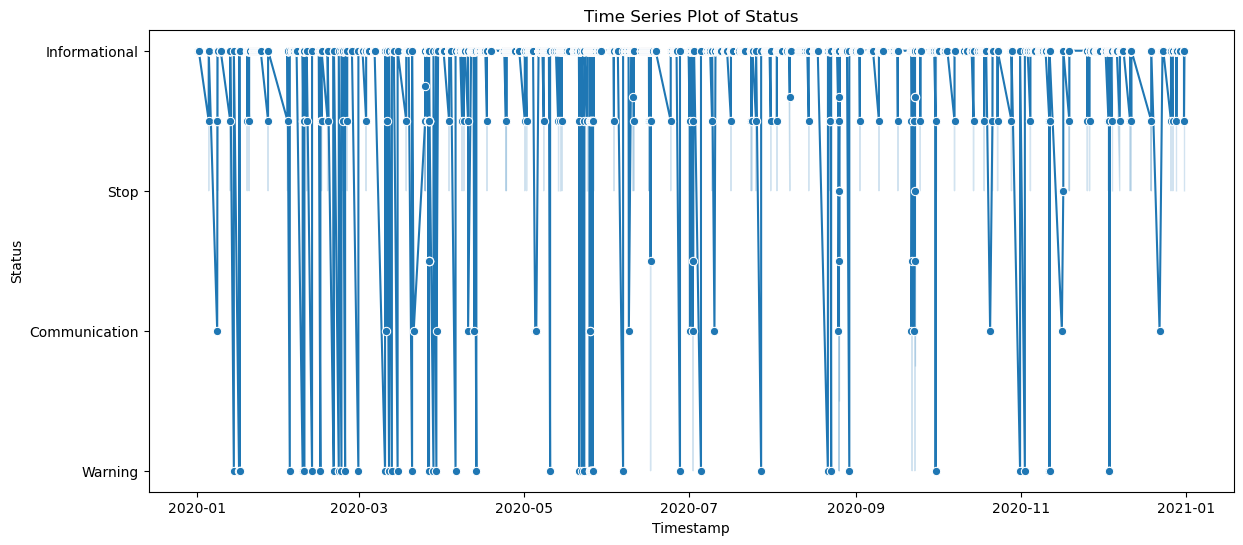

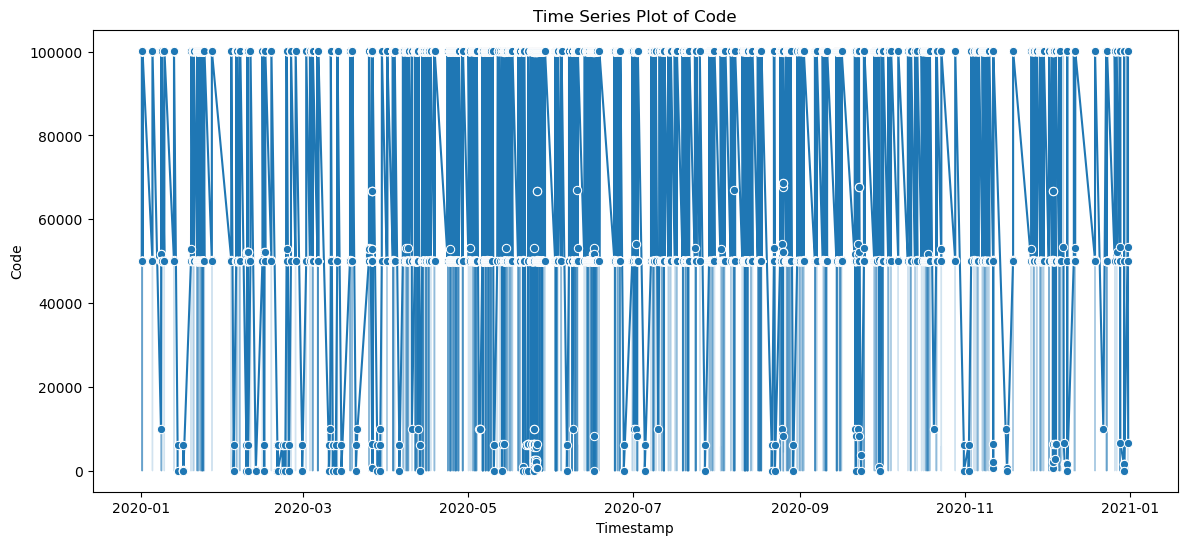

In [31]:
# Time Series Plot for 'Status'
plt.figure(figsize=(14, 6))
sns.lineplot(x='Timestamp start', y='Status', data=df, marker='o')
plt.title('Time Series Plot of Status')
plt.xlabel('Timestamp')
plt.ylabel('Status')
plt.show()

# Time Series Plot for 'Code'
plt.figure(figsize=(14, 6))
sns.lineplot(x='Timestamp start', y='Code', data=df, marker='o')
plt.title('Time Series Plot of Code')
plt.xlabel('Timestamp')
plt.ylabel('Code')
plt.show()

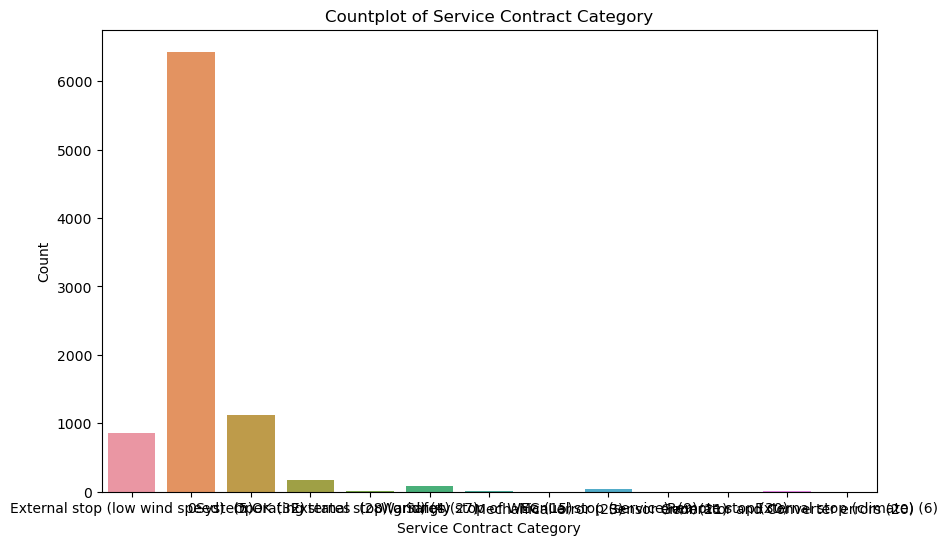

In [32]:
# Countplot for 'Service contract category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Service contract category', data=df)
plt.title('Countplot of Service Contract Category')
plt.xlabel('Service Contract Category')
plt.ylabel('Count')
plt.show()

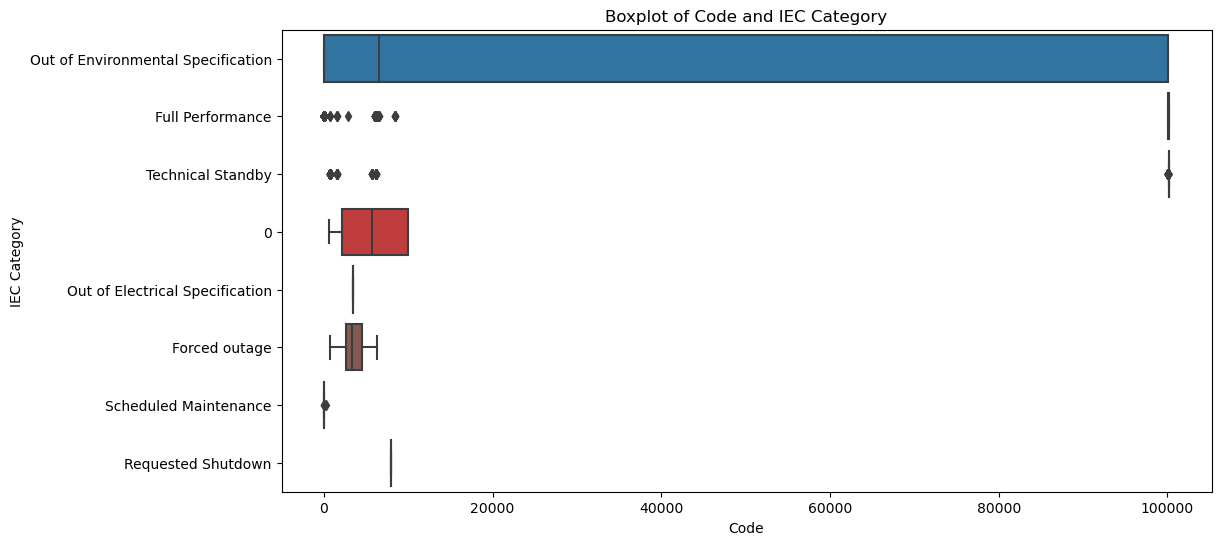

In [33]:
# Boxplot for 'Code' and 'IEC category'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Code', y='IEC category', data=df)
plt.title('Boxplot of Code and IEC Category')
plt.xlabel('Code')
plt.ylabel('IEC Category')
plt.show()

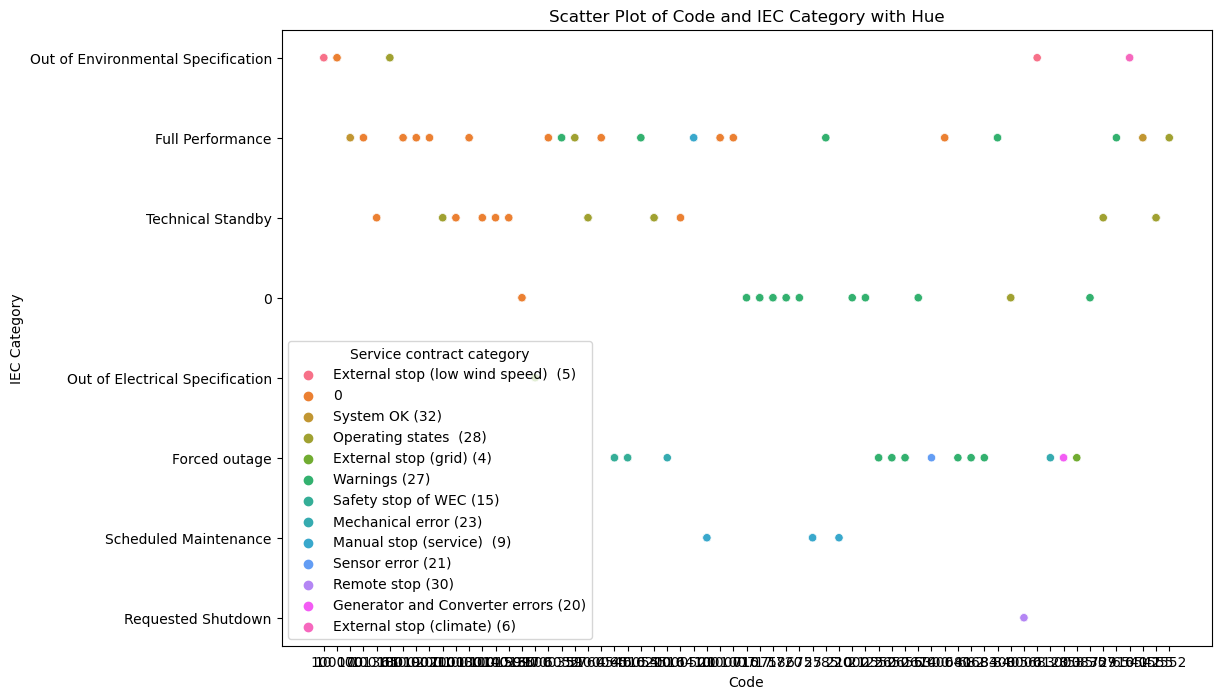

In [41]:
#'Code' and 'IEC category' to string before plotting
df['Code'] = df['Code'].astype(str)
df['IEC category'] = df['IEC category'].astype(str)

# Scatter plot for 'Service contract category'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Code', y='IEC category', hue='Service contract category', data=df)
plt.title('Scatter Plot of Code and IEC Category with Hue')
plt.xlabel('Code')
plt.ylabel('IEC Category')
plt.show()

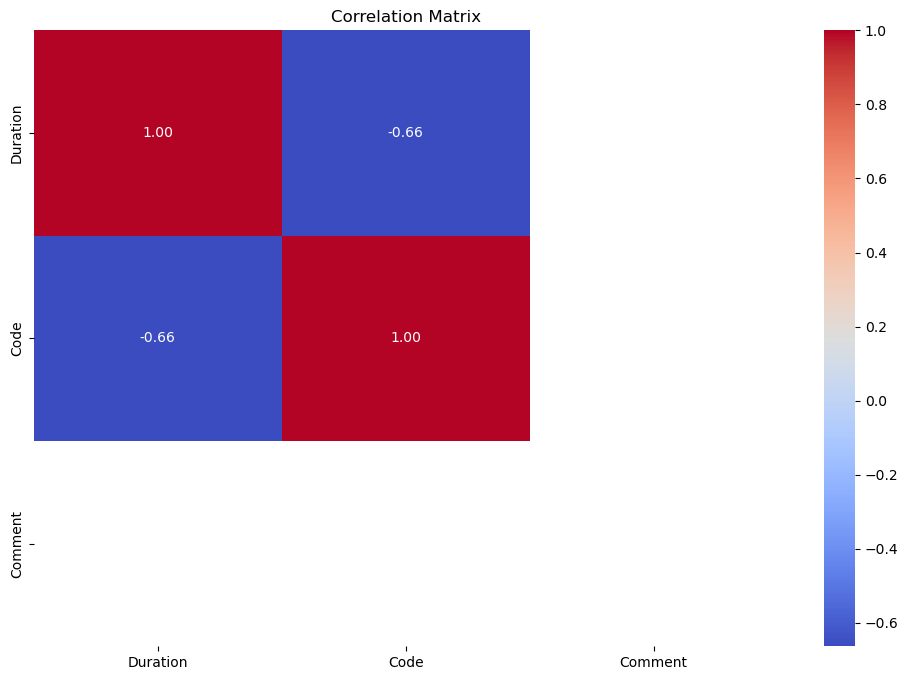

In [35]:
#non num to numerical
df['Timestamp start'] = pd.to_datetime(df['Timestamp start'])
df['Timestamp end'] = pd.to_datetime(df['Timestamp end'])

df['Duration'] = df['Duration'].apply(lambda x: pd.to_timedelta(x) if ':' in str(x) else pd.NaT)

# num columns for correlation matrix
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


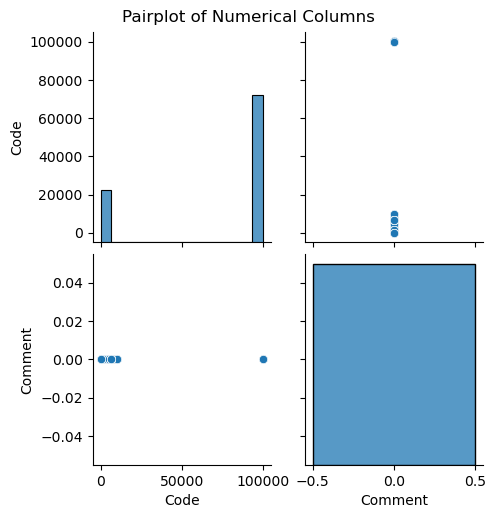

In [37]:
# Pairplot for numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

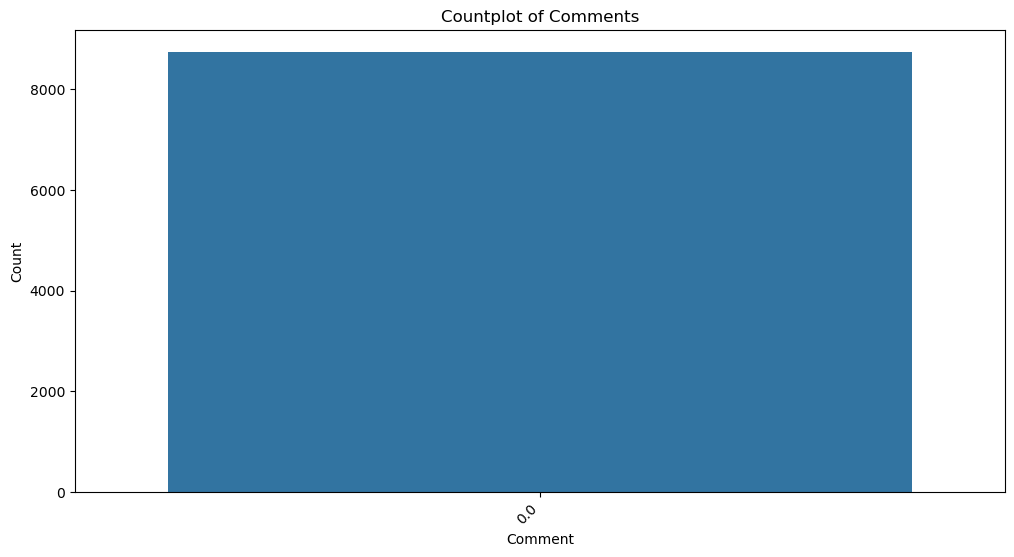

In [36]:
# Bar plot for 'Comment'
plt.figure(figsize=(12, 6))
sns.countplot(x='Comment', data=df)
plt.title('Countplot of Comments')
plt.xlabel('Comment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

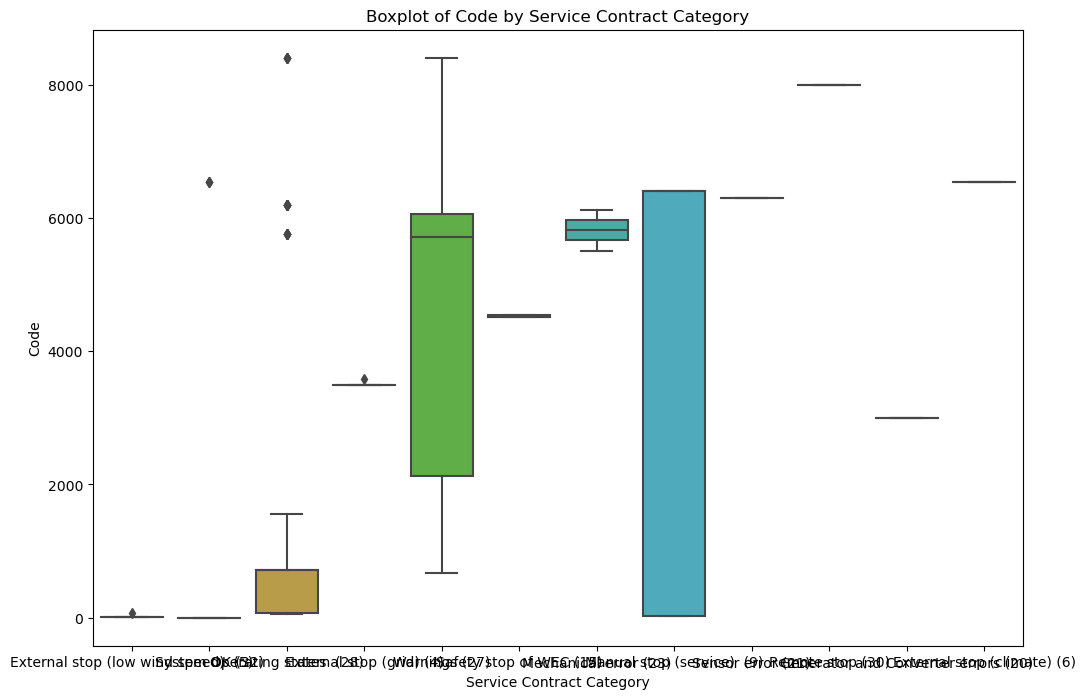

In [90]:
# Boxplot for 'Code' by 'Service contract category'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Service contract category', y='Code', data=df)
plt.title('Boxplot of Code by Service Contract Category')
plt.xlabel('Service Contract Category')
plt.ylabel('Code')
plt.show()

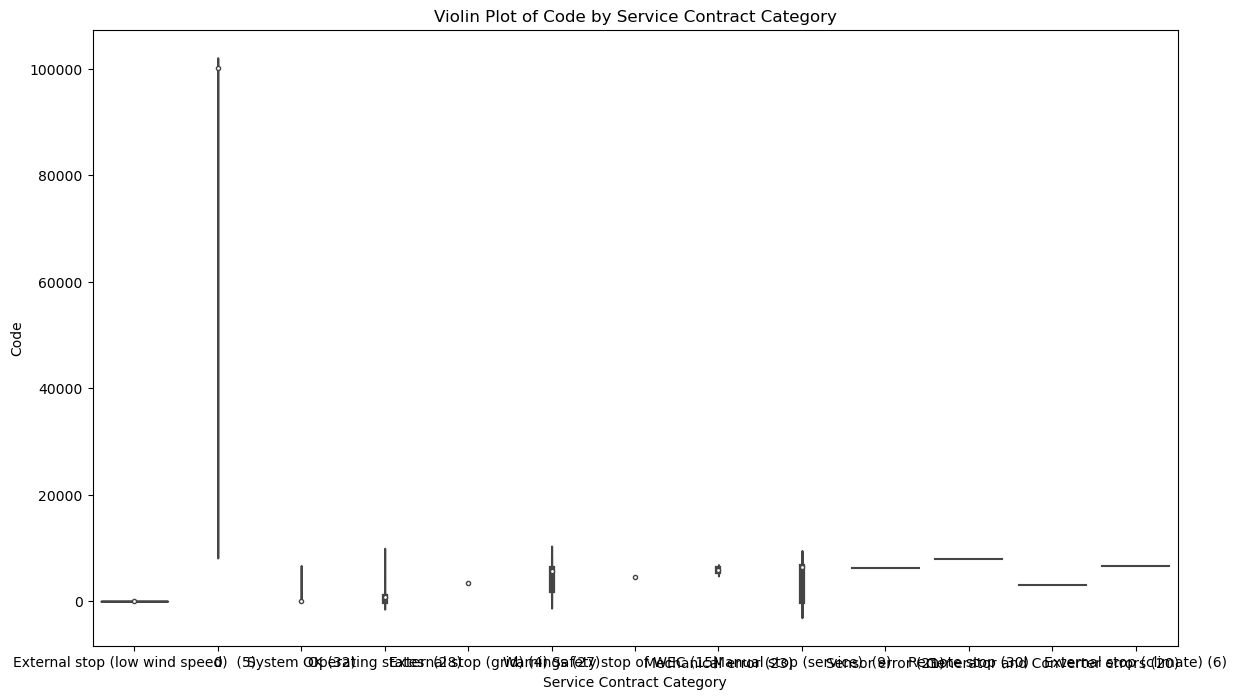

In [38]:
# Violin plot for 'Service contract category' and 'Code'
plt.figure(figsize=(14, 8))
sns.violinplot(x='Service contract category', y='Code', data=df)
plt.title('Violin Plot of Code by Service Contract Category')
plt.xlabel('Service Contract Category')
plt.ylabel('Code')
plt.show()

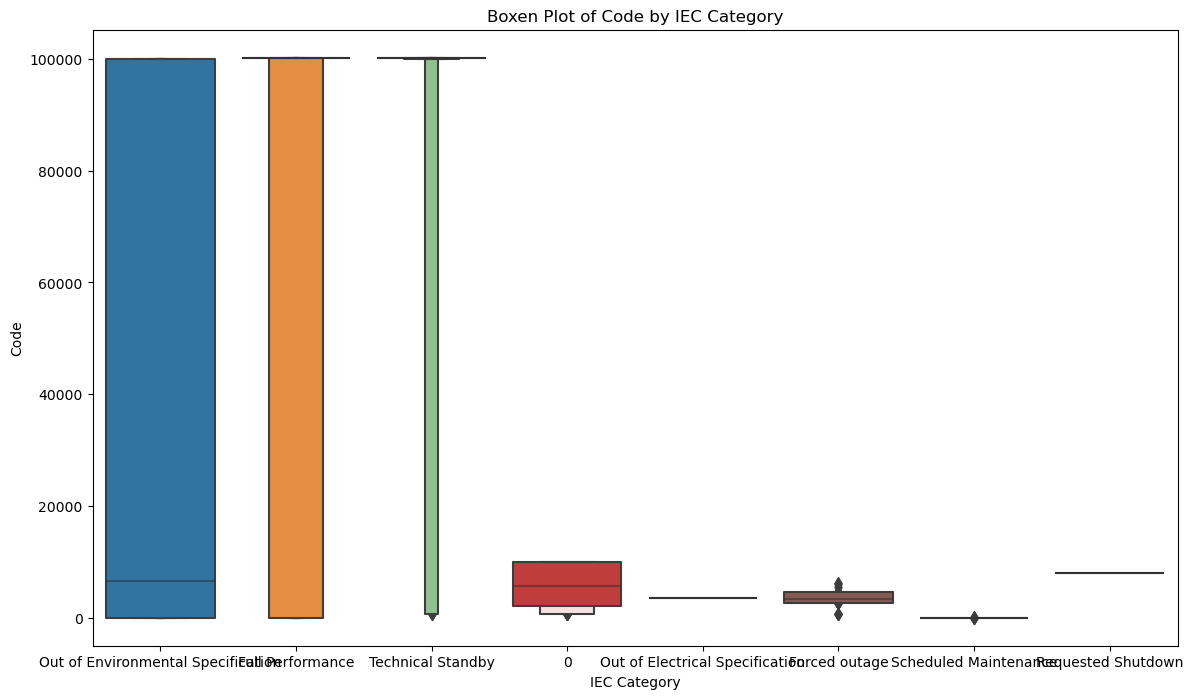

In [39]:
# Boxen plot for 'IEC category' and 'Code'
plt.figure(figsize=(14, 8))
sns.boxenplot(x='IEC category', y='Code', data=df)
plt.title('Boxen Plot of Code by IEC Category')
plt.xlabel('IEC Category')
plt.ylabel('Code')
plt.show()

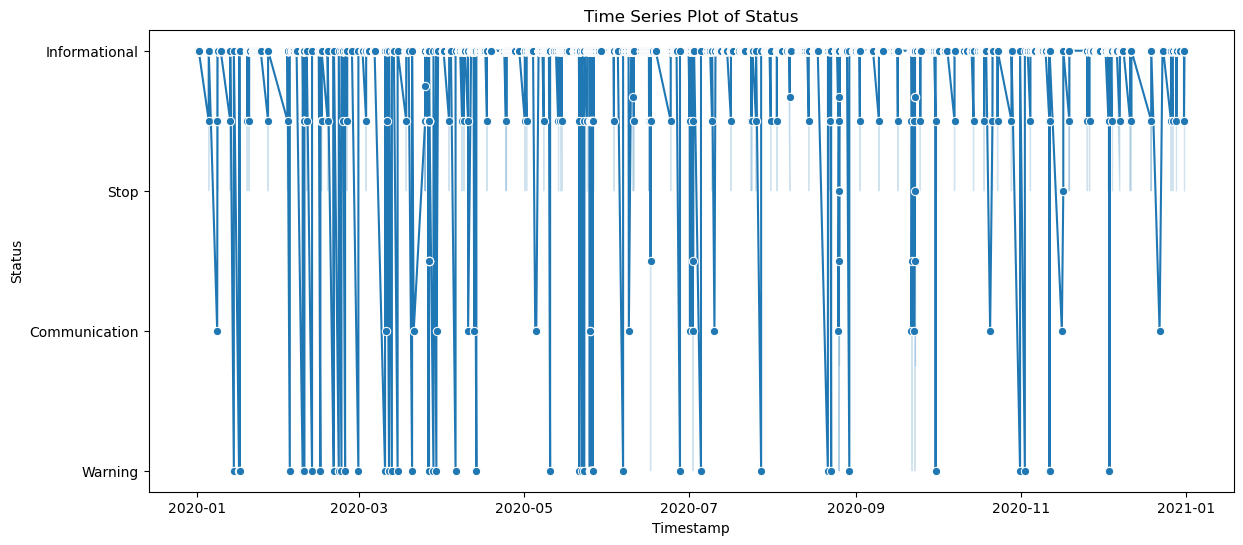

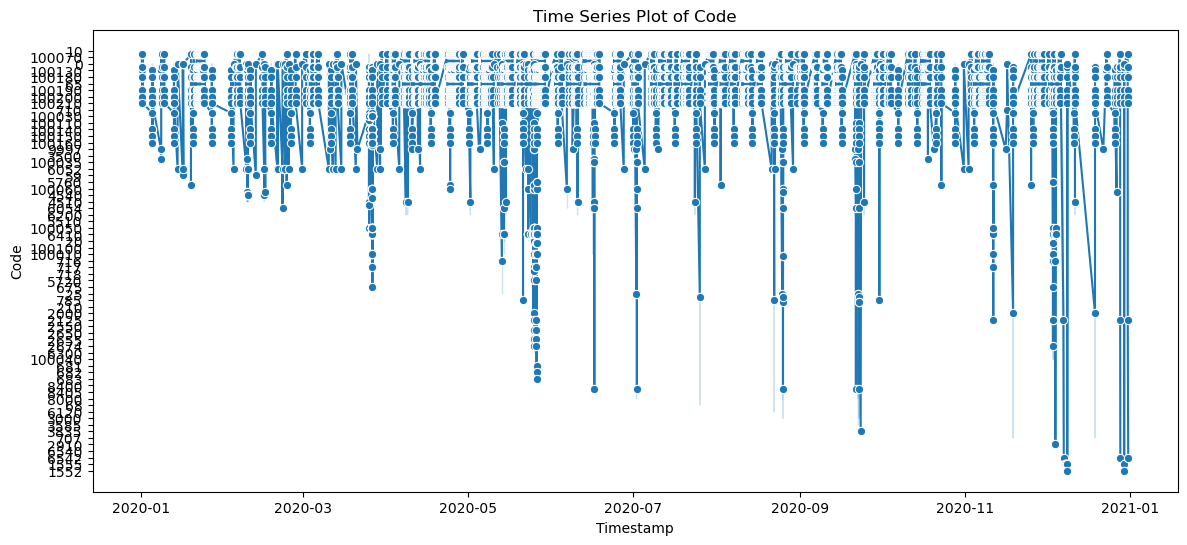

In [42]:
# Time Series Plot for 'Status'
plt.figure(figsize=(14, 6))
sns.lineplot(x='Timestamp start', y='Status', data=df, marker='o')
plt.title('Time Series Plot of Status')
plt.xlabel('Timestamp')
plt.ylabel('Status')
plt.show()

# Time Series Plot for 'Code'
plt.figure(figsize=(14, 6))
sns.lineplot(x='Timestamp start', y='Code', data=df, marker='o')
plt.title('Time Series Plot of Code')
plt.xlabel('Timestamp')
plt.ylabel('Code')
plt.show()

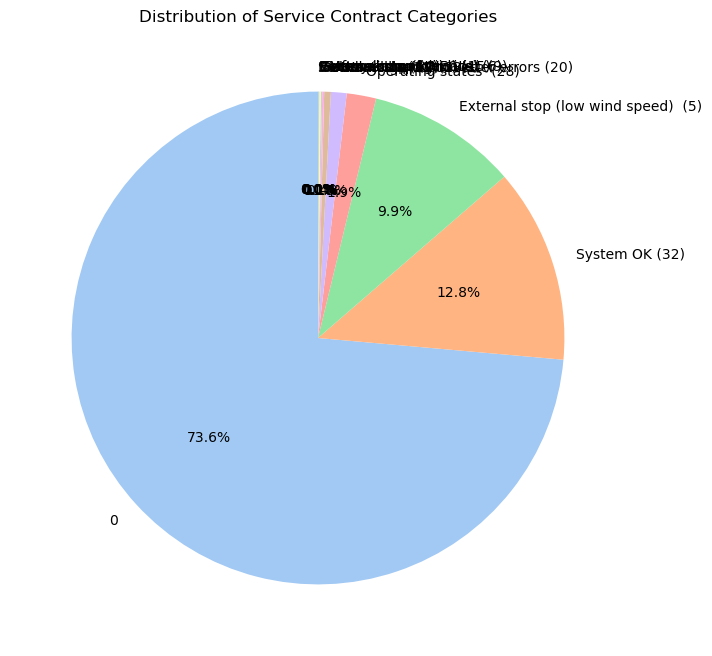

In [43]:
category_counts = df['Service contract category'].value_counts()
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Service Contract Categories')
plt.show()

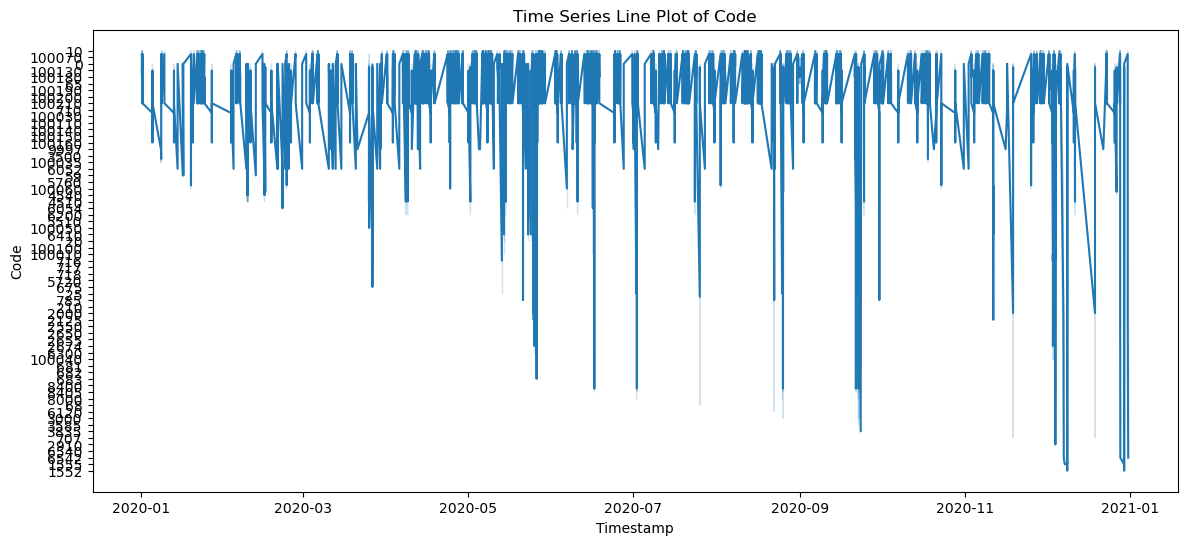

In [44]:
# Time Series Line Plot for 'Code'
plt.figure(figsize=(14, 6))
sns.lineplot(x='Timestamp start', y='Code', data=df)
plt.title('Time Series Line Plot of Code')
plt.xlabel('Timestamp')
plt.ylabel('Code')
plt.show()

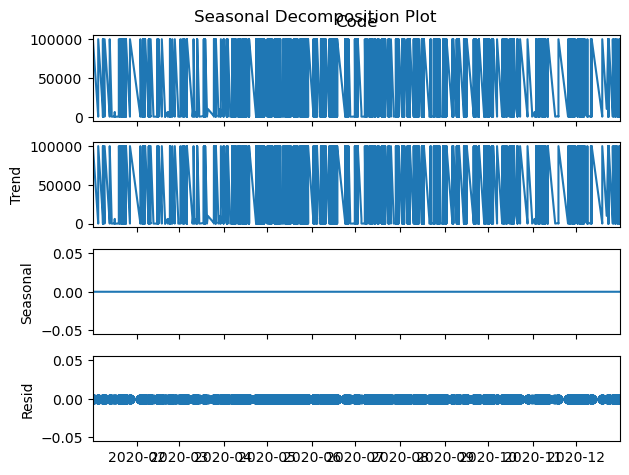

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
#'Timestamp start' is the datetime index
df.set_index('Timestamp start', inplace=True)

# Decompose the time series
result = seasonal_decompose(df['Code'], model='additive', period=1)
result.plot()
plt.suptitle('Seasonal Decomposition Plot')
plt.show()

<Figure size 1400x600 with 0 Axes>

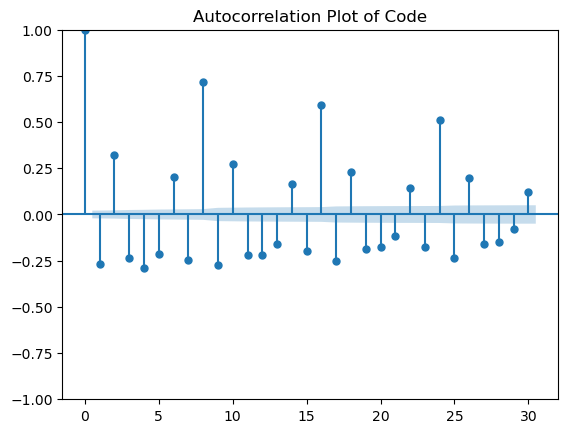

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
# Autocorrelation Plot for 'Code'
plt.figure(figsize=(14, 6))
plot_acf(df['Code'], lags=30)
plt.title('Autocorrelation Plot of Code')
plt.show()

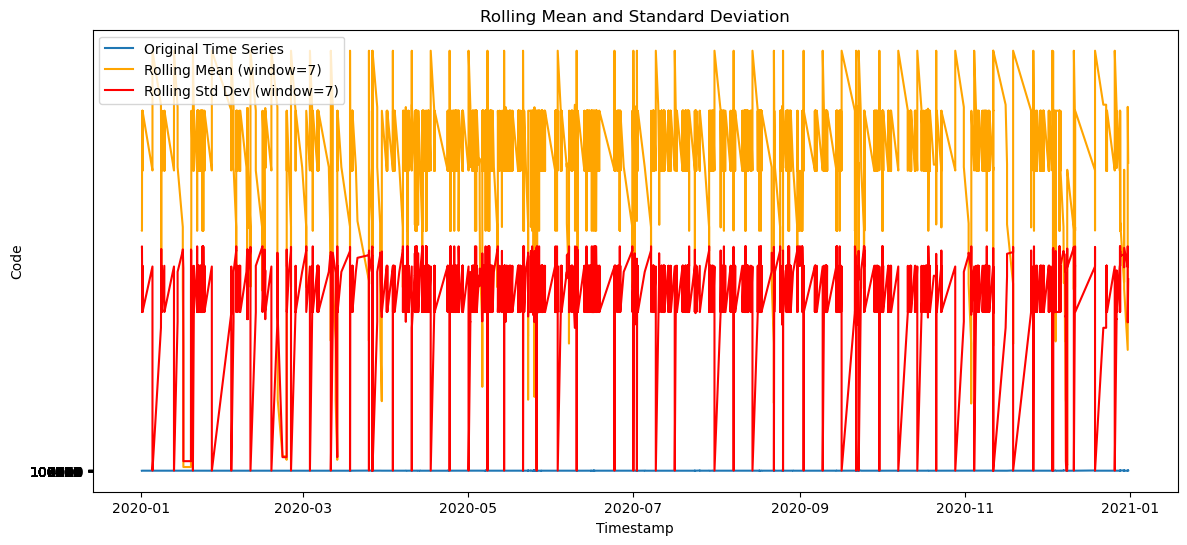

In [47]:
#rolling mean and standard deviation
rolling_mean = df['Code'].rolling(window=7).mean()
rolling_std = df['Code'].rolling(window=7).std()

# original time series, rolling mean, and rolling standard deviation
plt.figure(figsize=(14, 6))
plt.plot(df['Code'], label='Original Time Series')
plt.plot(rolling_mean, label='Rolling Mean (window=7)', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev (window=7)', color='red')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Timestamp')
plt.ylabel('Code')
plt.legend()
plt.show()

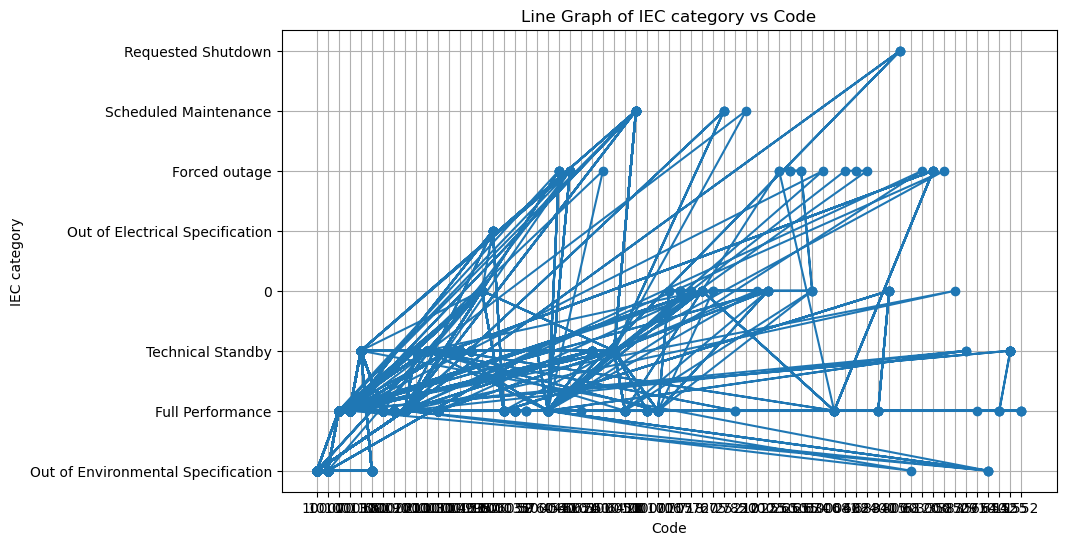

In [57]:
#line graph
x_column = 'Code'  
y_column = 'IEC category'  

plt.figure(figsize=(10, 6))
plt.plot(df[x_column], df[y_column], marker='o', linestyle='-')
plt.title(f'Line Graph of {y_column} vs {x_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

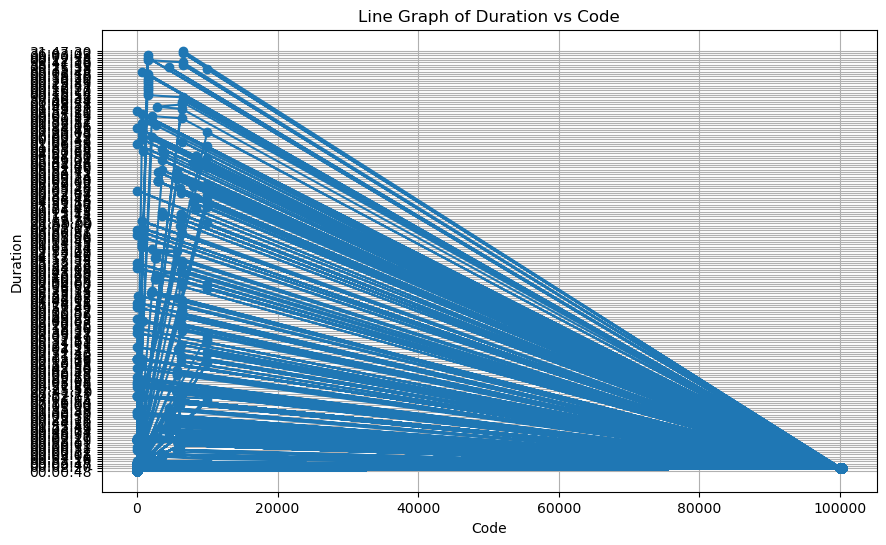

In [83]:
#line graph
x_column = 'Code'  
y_column = 'Duration'  

plt.figure(figsize=(10, 6))
plt.plot(df[x_column], df[y_column], marker='o', linestyle='-')
plt.title(f'Line Graph of {y_column} vs {x_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

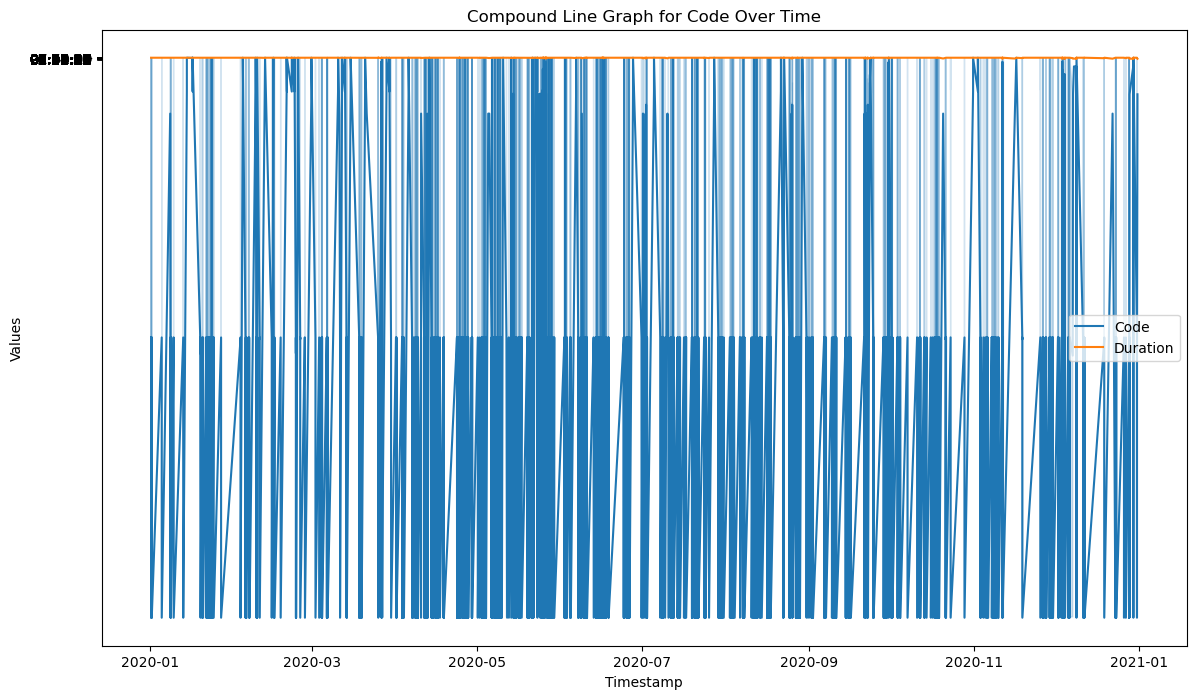

In [81]:
#timestamp
df['Timestamp start'] = pd.to_datetime(df['Timestamp start'])

#compound line graph 
plt.figure(figsize=(14, 8))
sns.lineplot(x='Timestamp start', y='Code', data=df, label='Code')
sns.lineplot(x='Timestamp start', y='Duration', data=df, label='Duration')

plt.title('Compound Line Graph for Code Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

In [70]:
print(df.columns)

Index(['Timestamp start', 'Timestamp end', 'Duration', 'Status', 'Code',
       'Message', 'Comment', 'Service contract category', 'IEC category'],
      dtype='object')


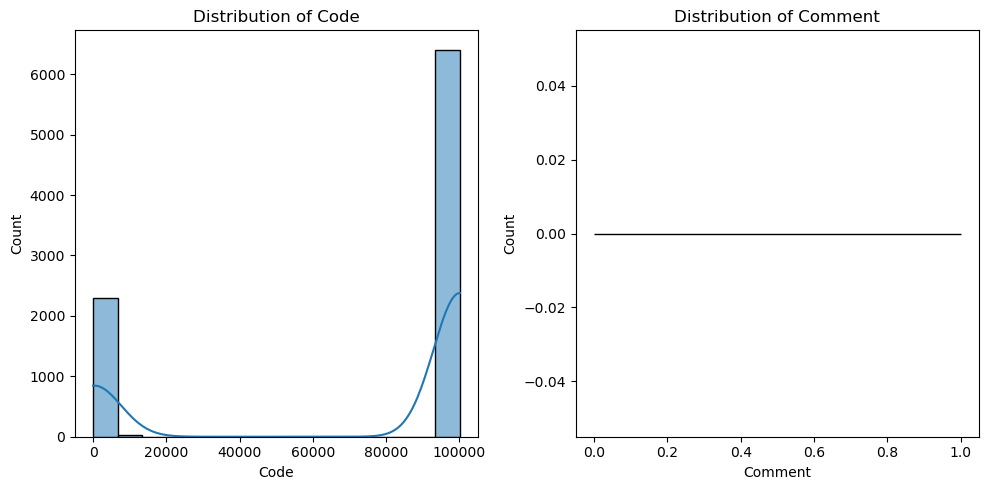

In [75]:
#EDA
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_count = len(num_cols)
num_cols_per_row = 3

plt.figure(figsize=(15, 5 * (num_cols_count // num_cols_per_row + 1)))
for i, column in enumerate(num_cols, 1):
    plt.subplot((num_cols_count // num_cols_per_row) + 1, num_cols_per_row, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

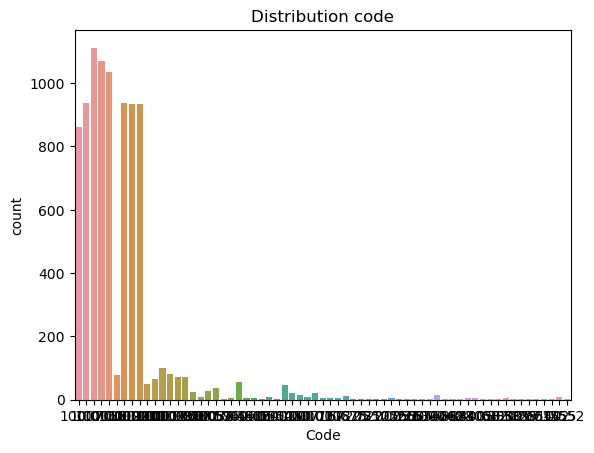

In [60]:
sns.countplot(x='Code', data=df)
plt.title('Distribution code')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


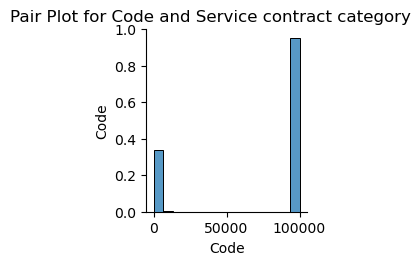

In [72]:
selected_column1 = 'Code'
selected_column2 = 'Service contract category'  

# Create a pair plot
sns.pairplot(df[[selected_column1, selected_column2]])
plt.suptitle(f'Pair Plot for {selected_column1} and {selected_column2}', y=1.02)
plt.show()

C:\Users\vigne\AppData\Local\Temp\ipykernel_6676\2479650609.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['column'] = 1
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


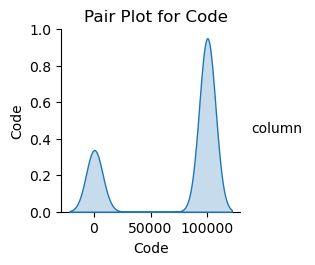

In [73]:
selected_column = 'Code'

selected_df = df[[selected_column]]

#dummy column
selected_df['column'] = 1

# Create a pair plot
sns.pairplot(selected_df, hue='column')
plt.suptitle(f'Pair Plot for {selected_column}', y=1.02)
plt.show()

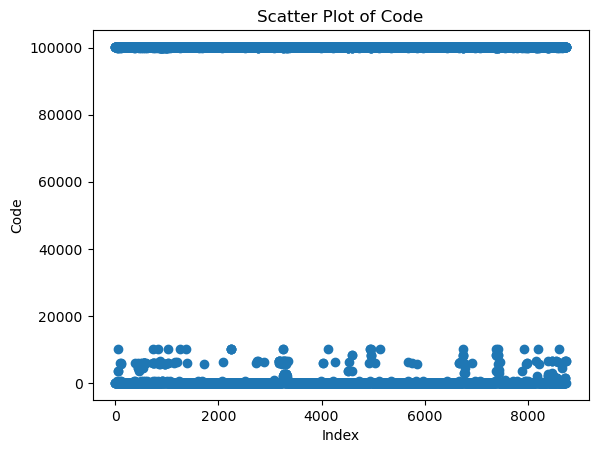

In [74]:
selected_column = 'Code' 
#scatter plot
plt.scatter(df.index, df[selected_column])
plt.title(f'Scatter Plot of {selected_column}')
plt.xlabel('Index')
plt.ylabel(selected_column)
plt.show()

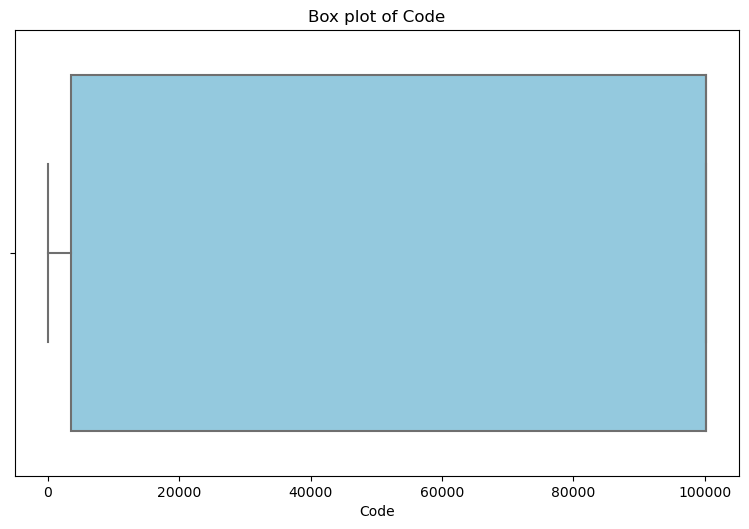

In [85]:
selected_columns = ['Code']  

#box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()